# Application d'analyse des données de Formule 1 saison 2022
celle que je peux récupérer en tout cas

Cette application est réutilisable pour les prochaines saisons

## Imports

In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

## Backend
dans cette partie, je fais tous ce qui ne relève pas de l'affichage des graphs.
Cela permet d'avoir directement toutes les données d'un coup pour ensuite juste avoir a
choisir le graph a afficher

In [2]:
# import data
data_speed = pd.read_csv('data/race_avg_speed.csv', sep=",")
data_points = pd.read_csv('data/race_points.csv', sep=",")
data_times = pd.read_csv('data/race_time.csv', sep=",")
data_best_lap = pd.read_csv('data/race_best_lap.csv', sep=",")
data_grid = pd.read_csv("data/race_grid.csv", sep=",")
data_result = pd.read_csv("data/race_result.csv")

jsonfile = open("teams.json")
teams_pilot = json.load(jsonfile)
pdata = pd.concat([data_result, data_points, data_grid, data_speed, data_times, data_best_lap])

# init constants
X = [i for i in range(1, data_points.shape[0]+1)]
n = 6
order = ["ham","rus","ver","per","lec","sai","gas","tsu","ric","nor","oco","alo","vet","str","lat","alb","bot","zho","mag","sch"]
colors = {
    "ham": "#00AA88",
    "rus": "#3C9E8C",
    "ver": "#0000FF",
    "per": "#00006E",
    "lec": "#FF0000",
    "sai": "#5E0101",
    "gas": "#555555",
    "tsu": "#999999",
    "ric": "#FF8C00",
    "nor": "#BA7827",
    "oco": "#FF8AFF",
    "alo": "#C75BC7",
    "vet": "#27542B",
    "str": "#1D9929",
    "lat": "#697DFF",
    "alb": "#293587",
    "bot": "#FF00A2",
    "zho": "#AB006C",
    "mag": "#5C0099",
    "sch": "#9900FF"
}

# prepare heatmap grid/result
grid_result = np.zeros((20, 20))
for pilot in order[:-2]:
    for i in range(data_grid.shape[0]):
        grid_result[data_grid[pilot][i]-1, data_result[pilot][i]-1] += 1




## Frontend
Ici les affichages seront séparé pour pouvoir choisir ce qu'on affiche

### Test data import

In [3]:
print(data_result)
# print(data_points)
# print(data_times)
# print(data_best_lap)
# print(data_grid)

# print(pilots_data)
# print(pdata)
# sns.heatmap(pdata.isna())

# print(teams_pilot)

   ham  rus  ver  per  lec  sai  gas  tsu  ric  nor  ...  alo  vet  str  lat  \
0    3    4   19   18    1    2   20    8   14   15  ...    9   12   16   13   
1   10    5    1    4    2    3    8   19   17    7  ...   16   13   18   14   

   alb  bot  zho  mag  sch  Unnamed: 20  
0    6   10    5  NaN  NaN          NaN  
1   15   11    9  NaN  NaN          NaN  

[2 rows x 21 columns]


### nuage de point
un graph avec la position sur la grille en x, et le classement en y. cela permet de predire si l'ordre de la grille est conservé

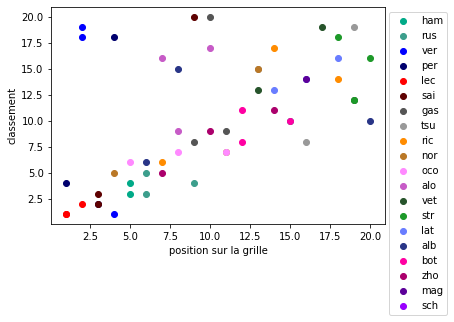

In [3]:
for pilot in order:
    plt.scatter(data_grid[pilot], data_result[pilot], color=colors[pilot], label=pilot)
plt.xlabel("position sur la grille")
plt.ylabel("classement")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))

toujours un nuage de point, mais avec les temps totaux en x et temps du meilleur tour en y

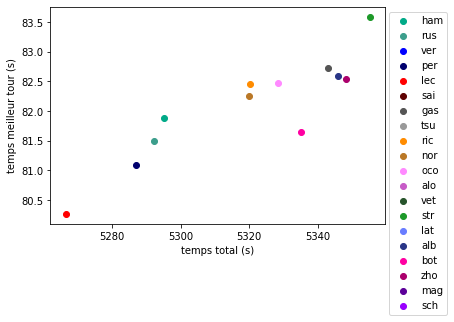

In [6]:
for pilot in order:
    plt.scatter(data_times[pilot][2], data_best_lap[pilot][2], color=colors[pilot], label=pilot)
plt.xlabel("temps total (s)")
plt.ylabel("temps meilleur tour (s)")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))

### Heatmap

Ici je vais faire toutes les heatmap.

la première ci-dessous est grid/result

<AxesSubplot:>

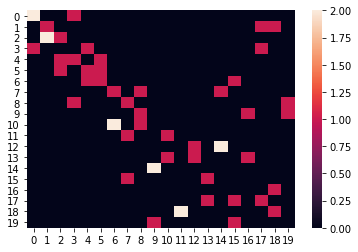

In [7]:
sns.heatmap(grid_result)